In [38]:
import torch
import random 
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [39]:
words=open('names.txt').read().splitlines()
words=open('names.txt','r').read().splitlines()
random.shuffle(words)
total_len = len(words)
train_end = int(0.8 * total_len)
dev_end = int(0.9 * total_len)

# Split the data
train_data = words[:train_end]
dev_data = words[train_end:dev_end]
test_data = words[dev_end:]

In [40]:
words

['karleen',
 'elchanan',
 'kyler',
 'rylie',
 'kareem',
 'afrah',
 'sota',
 'teleah',
 'izeah',
 'zyad',
 'rayonna',
 'daniele',
 'kaesyn',
 'jhenae',
 'everest',
 'haoyu',
 'celiyah',
 'riggin',
 'keianna',
 'orya',
 'phoebe',
 'lianna',
 'jamese',
 'giovonni',
 'srihitha',
 'juvenal',
 'maura',
 'wilkins',
 'eleyah',
 'brooklen',
 'reiya',
 'braylyn',
 'aolani',
 'rahiim',
 'bence',
 'dakari',
 'jackson',
 'tymeir',
 'ziarah',
 'kaceon',
 'belky',
 'airlie',
 'liana',
 'thang',
 'kaylynn',
 'harlan',
 'hazlie',
 'alanzo',
 'yehudis',
 'belinda',
 'isaia',
 'amado',
 'emir',
 'rodney',
 'garvey',
 'kiyomi',
 'meriam',
 'emerson',
 'savina',
 'arush',
 'vonn',
 'amore',
 'desai',
 'michelle',
 'fairy',
 'jamyia',
 'avanna',
 'jaycier',
 'springer',
 'surafel',
 'soliyana',
 'jullianna',
 'allyanna',
 'adelyn',
 'sofhia',
 'keyla',
 'edi',
 'novella',
 'mesiah',
 'bastion',
 'tanyah',
 'shanyla',
 'ozan',
 'marchesa',
 'didier',
 'shreyansh',
 'lennon',
 'hau',
 'ringo',
 'ariyelle',
 '

In [41]:
chars=enumerate(sorted(list(set(''.join(words)))))
stoi ={i:s+1 for s,i in chars}
stoi['.']=0
iots={i:s for s,i in stoi.items()}
iots[0]='.'
iots


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [57]:
#build the dataset
block_size=3 #the no of words taking to predict the next word
x=[]
y=[]

for w in dev_data:
   
    array=[0]*block_size
    for ch in w+'.':
        idx=stoi[ch]
        x.append(array)
        y.append(idx)
        print(''.join(iots[i] for i in array)+'-->' + ch)
        array=array[1:]+[idx]

X=torch.tensor(x)
Y=torch.tensor(y)
        
    


...-->e
..e-->l
.el-->e
ele-->n
len-->i
eni-->e
nie-->.
...-->e
..e-->a
.ea-->s
eas-->t
ast-->i
sti-->n
tin-->.
...-->h
..h-->i
.hi-->l
hil-->l
ill-->e
lle-->l
lel-->.
...-->k
..k-->a
.ka-->l
kal-->e
ale-->i
lei-->a
eia-->h
iah-->.
...-->a
..a-->u
.au-->s
aus-->t
ust-->y
sty-->n
tyn-->.
...-->g
..g-->e
.ge-->o
geo-->r
eor-->g
org-->.
...-->e
..e-->d
.ed-->a
eda-->h
dah-->i
ahi-->.
...-->a
..a-->v
.av-->i
avi-->y
viy-->a
iya-->n
yan-->.
...-->j
..j-->e
.je-->r
jer-->a
era-->m
ram-->i
ami-->a
mia-->h
iah-->.
...-->g
..g-->r
.gr-->e
gre-->e
ree-->n
een-->l
enl-->e
nle-->y
ley-->.
...-->k
..k-->e
.ke-->i
kei-->t
eit-->h
ith-->a
tha-->n
han-->.
...-->t
..t-->r
.tr-->i
tri-->u
riu-->m
ium-->p
ump-->h
mph-->.
...-->r
..r-->o
.ro-->m
rom-->i
omi-->n
min-->.
...-->l
..l-->i
.li-->a
lia-->n
ian-->a
ana-->h
nah-->.
...-->d
..d-->n
.dn-->y
dny-->l
nyl-->a
yla-->h
lah-->.
...-->n
..n-->i
.ni-->c
nic-->k
ick-->l
ckl-->a
kla-->u
lau-->s
aus-->.
...-->r
..r-->y
.ry-->a
rya-->t
yat-->t
att-->.
...-->m


In [43]:
X

tensor([[ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11,  1],
        ...,
        [ 0,  0, 10],
        [ 0, 10,  1],
        [10,  1, 14]])

In [44]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,200),generator=g)*0.1
b1=torch.randn(200,generator=g)*0.01
W2=torch.randn((200,27),generator=g)*0.1
b2=torch.randn(27,generator=g)*0

In [45]:
# torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape
#or another method do it is by using view function also with cat new memory is created which is inefficient 


In [46]:
# counts=logits.exp()
# prob=counts/counts.sum(1,keepdims=True)
# prob.shape
# size=len(prob[:,0])
# size
# loss=-prob[torch.arange(size),Y].log().mean()

#pytorch offers a function to calculate loss and we will prefer it over this becoz it do not creates new tensors


In [47]:
parameters=[W1,W2,b1,b2,C]
for p in parameters:
    p.requires_grad=True


In [48]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [49]:
X.shape

torch.Size([182452, 3])

In [59]:
lri=[]
lossi=[]
for i in range(50000):
    ix=torch.randint(0,X.shape[0],(60,))
   
    #forward pass
    emb=C[X[ix]]
   
    preact=emb.view((emb.shape[0],30)) @ W1 +b1
    h=torch.tanh(preact)
          
    logits=h@W2+b2
    loss=F.cross_entropy(logits,Y[ix])
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    lr=0.1
    for p in parameters:
        p.data+=-lr*p.grad
    #stats
  
    print(loss.item())


1.9955328702926636
2.255263090133667
2.7734053134918213
2.2500085830688477
2.2750368118286133
2.089454174041748
2.2584733963012695
1.9768834114074707
1.8946034908294678
2.060821056365967
1.9536709785461426
2.0990583896636963
2.4546937942504883
2.2282609939575195
2.350216865539551
2.122886896133423
2.1242096424102783
2.025021553039551
2.1197614669799805
2.2026400566101074
2.068540096282959
2.2224912643432617
2.3132753372192383
2.118574380874634
2.3849477767944336
2.2307379245758057
1.9246101379394531
2.337362766265869
2.2144598960876465
1.9675488471984863
2.344280958175659
2.2941644191741943
2.270972967147827
2.2175827026367188
2.087324380874634
2.103989601135254
1.9526429176330566
1.9764080047607422
2.0343968868255615
2.3071796894073486
2.20133638381958
2.067178726196289
2.073421001434326
2.1313087940216064
2.286973714828491
2.133214235305786
2.398739814758301
2.262636661529541
2.2386348247528076
2.164850950241089
2.2040085792541504
2.014634847640991
2.0951898097991943
2.16706633567810

In [51]:
emb.shape

torch.Size([60, 3, 10])

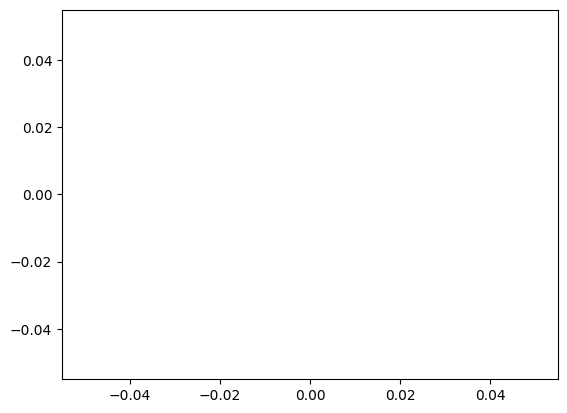

In [52]:
plt.plot(lri,lossi )

In [58]:

emb=C[X[ix]]
h=torch.tanh(emb.view((emb.shape[0],30)) @ W1 +b1)
logits=h@W2+b2
loss=F.cross_entropy(logits,Y[ix])
loss                        



IndexError: index 151247 is out of bounds for dimension 0 with size 22928